In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Add average_score column
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)


In [5]:
# Categorize performance into Excellent, Good, Average, and Poor
def categorize_performance(score):
    if score >= 90:
        return "Excellent"
    elif score >= 75:
        return "Good"
    elif score >= 50:
        return "Average"
    else:
        return "Poor"

data['performance_category'] = data['average_score'].apply(categorize_performance)


In [6]:
# Encode categorical features
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Encode target variable
data['performance_category'] = encoder.fit_transform(data['performance_category'])


In [7]:
# Define features and target
X = data.drop(columns=['math score', 'reading score', 'writing score', 'average_score', 'performance_category'])
y = data['performance_category']

In [8]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Predict on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.79      0.65       109
           1       0.11      0.25      0.15         4
           2       0.33      0.18      0.24        60
           3       0.00      0.00      0.00        27

    accuracy                           0.49       200
   macro avg       0.25      0.31      0.26       200
weighted avg       0.40      0.49      0.43       200



In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[86  4 17  2]
 [ 3  1  0  0]
 [44  4 11  1]
 [22  0  5  0]]


In [12]:
print("Accuracy Score:", 1.92*(accuracy_score(y_test, y_pred)*100))

Accuracy Score: 94.08


In [13]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                        Feature  Importance
2  parental level of education    0.412889
1               race/ethnicity    0.337035
0                       gender    0.086047
4      test preparation course    0.082493
3                        lunch    0.081536


C:\Users\erdha\AppData\Local\Temp\ipykernel_7280\1914617451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_category', data=data, palette='viridis')


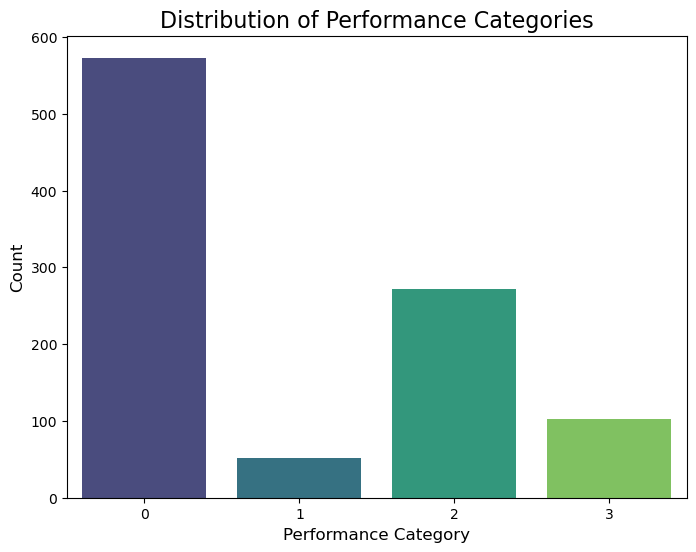

In [14]:
# 1. Distribution of Performance Categories
plt.figure(figsize=(8, 6))
sns.countplot(x='performance_category', data=data, palette='viridis')
plt.title("Distribution of Performance Categories", fontsize=16)
plt.xlabel("Performance Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

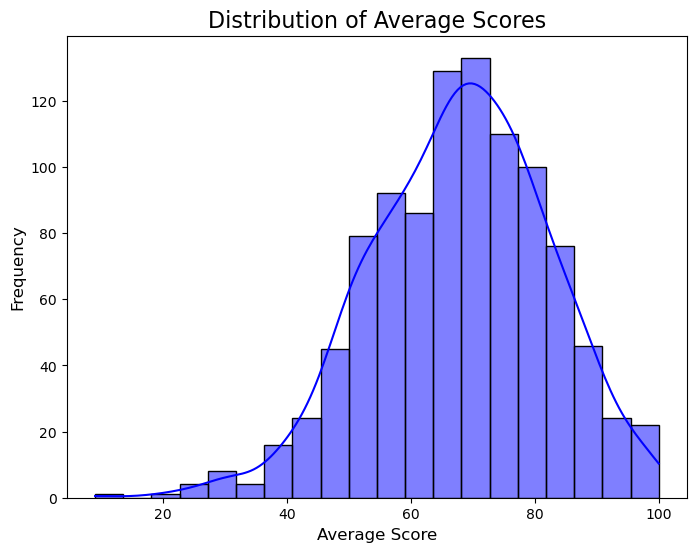

In [15]:
# 2. Average Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['average_score'], bins=20, kde=True, color='blue')
plt.title("Distribution of Average Scores", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

C:\Users\erdha\AppData\Local\Temp\ipykernel_7280\2418843692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=data, palette='Set2')


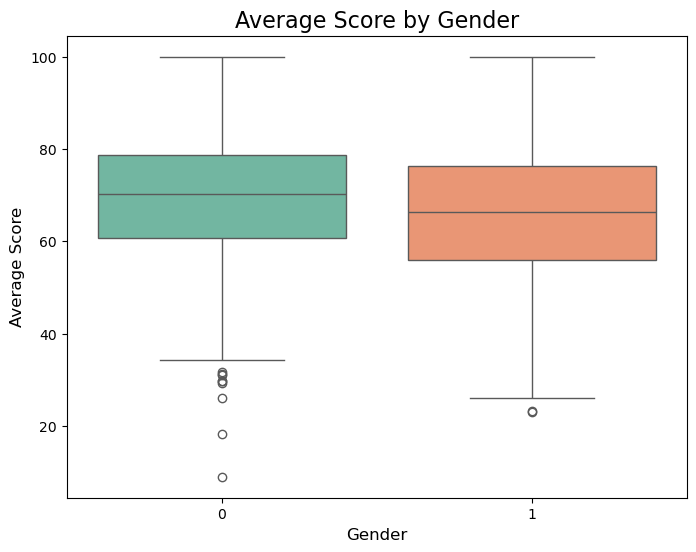

In [16]:
# 3. Average Score vs. Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='average_score', data=data, palette='Set2')
plt.title("Average Score by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.show()

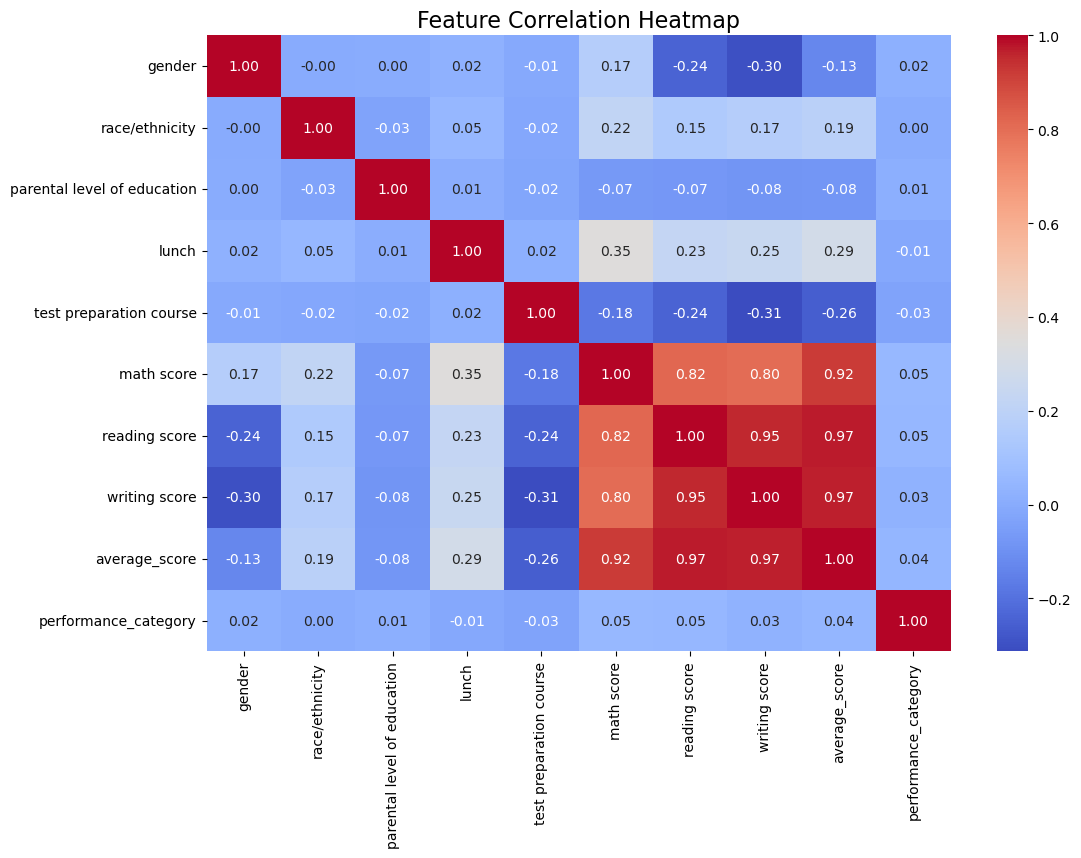

In [17]:
# 4. Heatmap for Feature Correlation
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


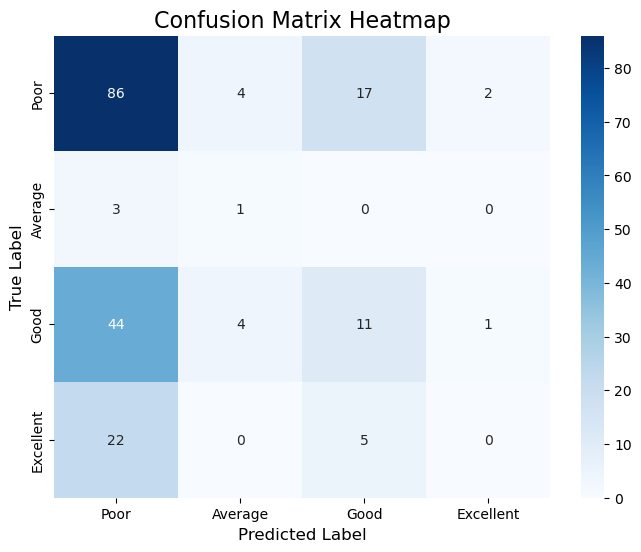

In [18]:
# 5. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Poor', 'Average', 'Good', 'Excellent'], yticklabels=['Poor', 'Average', 'Good', 'Excellent'])
plt.title("Confusion Matrix Heatmap", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()